In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
FL_fin_df = pd.read_csv('census/financial/FL_fin.csv')
FL_housing_df = pd.read_csv('census/housing/FL_housing.csv')
FL_income_df = pd.read_csv('census/income/FL_income.csv')
FL_pov_df = pd.read_csv('census/poverty/FL_pov.csv')

In [3]:
# Extract the required columns from each DataFrame
x = FL_housing_df['occupied_housing_units'].values.astype(float).reshape(-1, 1)  # Reshape to a 2D array
y = FL_income_df['families_median_income'].values.astype(float)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -26.358892108127748
Coefficients: [0.66250372]


In [7]:
print('Training R^2:', model.score(x_train, y_train))
print('Testing R^2:', model.score(x_test, y_test))

Training R^2: 0.7914303171479504
Testing R^2: 0.8047372676498132


In [8]:
data = pd.read_csv('census/housing/FL_housing.csv')

In [20]:
def extract_county_name(info):
    parts = info.split(';')
    county_name = parts[1].strip()
    return county_name
    

In [23]:
county_names = []
for info in data['geographic_area_name']:
    county_name = extract_county_name(info)
   
    if county_name not in county_names:
      
        county_names.append(county_name)

In [31]:
county_vacant_units = {}


In [32]:
for index, row in data.iterrows():
    county_name = extract_county_name(row['geographic_area_name'])
   
    if county_name in county_names:
        vacant_units = row['vacant_housing_units']
  
        if county_name in county_vacant_units:
            county_vacant_units[county_name] += vacant_units
        else:
            county_vacant_units[county_name] = vacant_units

In [42]:
sorted_county_vacant_units = dict(sorted(county_vacant_units.items(), key=lambda item: item[1], reverse=True))
sorted_county_vacant_units

{'Miami-Dade County': 122598,
 'Palm Beach County': 118709,
 'Broward County': 117648,
 'Lee County': 108568,
 'Pinellas County': 97560,
 'Orange County': 73731,
 'Collier County': 73046,
 'Polk County': 55878,
 'Sarasota County': 55256,
 'Manatee County': 46702,
 'Hillsborough County': 46364,
 'Brevard County': 43664,
 'Duval County': 41198,
 'Volusia County': 41162,
 'Osceola County': 37159,
 'Pasco County': 35698,
 'Bay County': 29750,
 'Charlotte County': 26659,
 'Walton County': 25253,
 'Lake County': 24281,
 'Marion County': 24083,
 'St. Lucie County': 23611,
 'Monroe County': 19646,
 'Escambia County': 19586,
 'St. Johns County': 18864,
 'Okaloosa County': 18074,
 'Indian River County': 18066,
 'Leon County': 15352,
 'Alachua County': 15154,
 'Martin County': 14869,
 'Citrus County': 14591,
 'Highlands County': 12920,
 'Sumter County': 12618,
 'Seminole County': 11257,
 'Hernando County': 10466,
 'Flagler County': 8777,
 'Santa Rosa County': 7061,
 'Putnam County': 6401,
 'Clay 

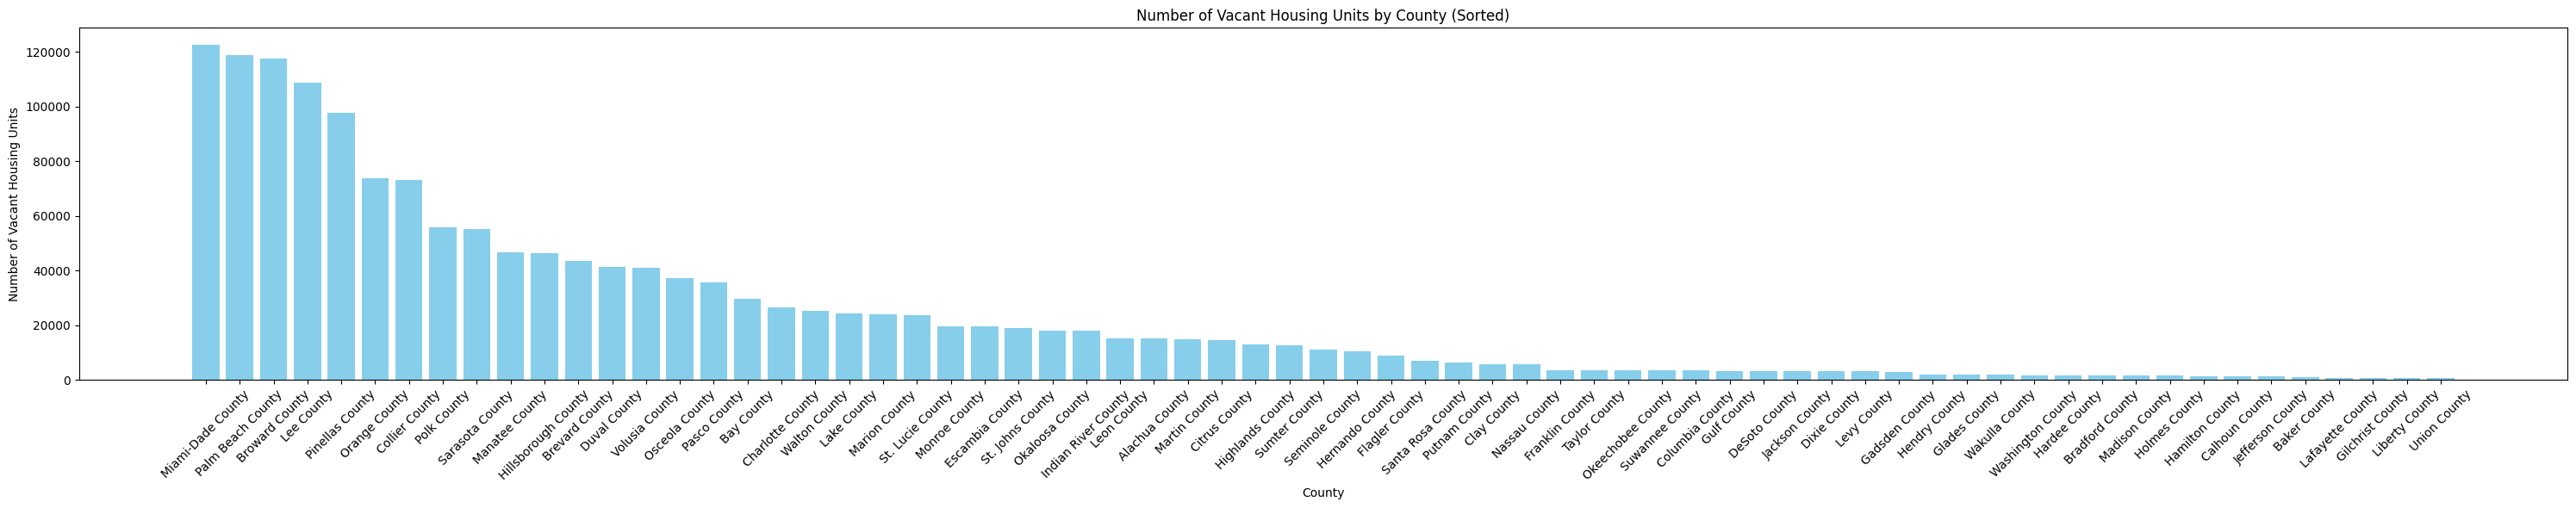

In [45]:
plt.figure(figsize=(30, 6))
plt.bar(sorted_county_vacant_units.keys(), sorted_county_vacant_units.values(), color='skyblue')

plt.xlabel('County')
plt.ylabel('Number of Vacant Housing Units')
plt.title('Number of Vacant Housing Units by County (Sorted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
FL_risk = pd.read_csv('risk_index/NRI_Table_CensusTracts_FL_short.csv')

In [54]:
county_risk = {}  

for index, row in FL_risk.iterrows():
    county_name = row['COUNTY'] + ' County'  
    if county_name in county_names:
        hrcn_expp = row['HRCN_EXPP']
        cfld_expp = row['CFLD_EXPP']
        total_expp = hrcn_expp + cfld_expp
 
        if county_name in county_risk:
            county_risk[county_name]['hurricane_exposure'] += hrcn_expp
            county_risk[county_name]['coastal_flood_exposure'] += cfld_expp
            county_risk[county_name]['total_exposure'] += total_expp

        else:
            county_risk[county_name] = {
                'hurricane_exposure': hrcn_expp,
                'coastal_flood_exposure': cfld_expp,
                'total_exposure': total_expp
            }

county_risk

{'Alachua County': {'hurricane_exposure': 277980.91866597795,
  'coastal_flood_exposure': 0.0,
  'total_exposure': 277980.91866597795},
 'Baker County': {'hurricane_exposure': 27852.0,
  'coastal_flood_exposure': 0.0,
  'total_exposure': 27852.0},
 'Bay County': {'hurricane_exposure': 174864.83034644922,
  'coastal_flood_exposure': 21972.88309653072,
  'total_exposure': 196837.71344298},
 'Bradford County': {'hurricane_exposure': 28233.0,
  'coastal_flood_exposure': 0.0,
  'total_exposure': 28233.0},
 'Brevard County': {'hurricane_exposure': 606060.6315721055,
  'coastal_flood_exposure': 60398.34759909394,
  'total_exposure': 666458.9791711994},
 'Broward County': {'hurricane_exposure': 1940790.3349503516,
  'coastal_flood_exposure': 302898.3350032864,
  'total_exposure': 2243688.669953637},
 'Calhoun County': {'hurricane_exposure': 13597.0,
  'coastal_flood_exposure': 102.97223507999999,
  'total_exposure': 13699.97223508},
 'Charlotte County': {'hurricane_exposure': 186730.1143335043

In [55]:
total_exposure = []
vacant_home = []

In [69]:
for county_name in county_risk.items():
    total_exposure.append(data['total_exposure'])
total_exposure

[277980.91866597795,
 27852.0,
 196837.71344298,
 28233.0,
 666458.9791711994,
 2243688.669953637,
 13699.97223508,
 276613.74160106305,
 178460.70767324333,
 237592.22639762287,
 641100.9066431475,
 69647.61240194779,
 35750.309587517346,
 20863.569287379167,
 1079047.038517291,
 341636.6787372003,
 128819.13727596134,
 20366.4522085322,
 nan,
 18800.21039479712,
 12188.3611509,
 20578.163518193407,
 nan,
 25366.549272502125,
 44414.370102712346,
 201349.84789144696,
 nan,
 1700508.3484383083,
 19618.0,
 180023.68138356582,
 nan,
 14515.989485804896,
 8543.661620479365,
 383081.1887082217,
 1180165.508683697,
 293107.3947689016,
 47208.21044290187,
 6410.41433129,
 nan,
 500985.6714931432,
 375603.9038865909,
 183285.38833951287,
 3891793.081297645,
 194061.50344115743,
 104952.03203839847,
 234763.20091329288,
 39453.43237727776,
 1428656.9449324186,
 nan,
 1572922.063464111,
 666333.8412684655,
 1307087.019642443,
 nan,
 77549.22795124231,
 334083.6813000919,
 347477.2973479117,
 20

In [65]:
for vacant in county_vacant_units.values():
    vacant_home.append(vacant)


In [67]:
X = np.array(total_exposure).reshape(-1, 1)  # Reshape to a 2D array
y = np.array(vacant_home)

In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_trimmed = X[:len(y)]
X_imputed = imputer.fit_transform(X_trimmed)

In [77]:
model = LinearRegression()
model.fit(X_imputed, y)

LinearRegression()

In [79]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

# Print R-squared value
print('R-squared:', model.score(X_imputed, y))

Intercept: 18330.800441275205
Coefficient: 0.03512593808353234
R-squared: 0.2025046077805278


In [ ]:
#r-squard 0.2025 proved that there is no direct correlation between the number of vancancy in each county and the impact population in a
#flood or hurrican, therefore we can assume that people are relatively safe to move to miami-dade county as priority